# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [7]:
import os
import sys
sys.path.append('/Users/lacfo/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/Users/lacfo/COCO'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=5.76s)
creating index...
index created!
loading annotations into memory...
Done (t=0.45s)
creating index...
index created!


In [62]:
ids

[1835008,
 1048579,
 1572868,
 1572870,
 1223340,
 2097162,
 349527,
 2097164,
 2097168,
 1048593,
 524306,
 1572887,
 1048600,
 524292,
 2009775,
 524316,
 1572895,
 2097186,
 2097188,
 2097158,
 1048615,
 1572904,
 1048621,
 1572911,
 1048626,
 1572918,
 1310729,
 2097208,
 1572924,
 1572874,
 524350,
 524351,
 524352,
 524354,
 1572932,
 1485494,
 524358,
 1239516,
 1854036,
 2097225,
 2097231,
 524368,
 2097234,
 1660259,
 87,
 1048664,
 1048666,
 524380,
 1048670,
 1048671,
 2097248,
 2097249,
 579605,
 2097252,
 1572967,
 708794,
 524393,
 2097258,
 524395,
 1048686,
 524399,
 1048688,
 1048690,
 1835027,
 1572981,
 1048694,
 1572983,
 1048697,
 524411,
 524413,
 1572991,
 1693438,
 1572995,
 524420,
 1572997,
 1048710,
 1573001,
 556998,
 524428,
 524429,
 1573006,
 144,
 1223363,
 1048725,
 2097302,
 524440,
 524442,
 156,
 1310746,
 524446,
 1573026,
 2097179,
 1573028,
 1048742,
 524455,
 1573032,
 1048745,
 1573034,
 1048749,
 2097328,
 524465,
 524466,
 1573045,
 524470,
 1

In [10]:
import json
dataset = json.load(open(instances_annFile, 'r'))

In [11]:
type(dataset)

dict

In [14]:
list(dataset.keys())

['licenses', 'info', 'annotations', 'images', 'categories']

In [16]:
dataset['annotations'][0]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [18]:
dataset['images'][0]

{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'date_captured': '2013-11-14 11:18:45',
 'file_name': 'COCO_val2014_000000391895.jpg',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'height': 360,
 'id': 391895,
 'license': 3,
 'width': 640}

In [63]:
dataset['categories'][0]

{'id': 1, 'name': 'person', 'supercategory': 'person'}

In [60]:
name_set = set()
for cat in dataset['categories']:
    name_set.add(cat['name'])

In [61]:
name_set

{'airplane',
 'apple',
 'backpack',
 'banana',
 'baseball bat',
 'baseball glove',
 'bear',
 'bed',
 'bench',
 'bicycle',
 'bird',
 'boat',
 'book',
 'bottle',
 'bowl',
 'broccoli',
 'bus',
 'cake',
 'car',
 'carrot',
 'cat',
 'cell phone',
 'chair',
 'clock',
 'couch',
 'cow',
 'cup',
 'dining table',
 'dog',
 'donut',
 'elephant',
 'fire hydrant',
 'fork',
 'frisbee',
 'giraffe',
 'hair drier',
 'handbag',
 'horse',
 'hot dog',
 'keyboard',
 'kite',
 'knife',
 'laptop',
 'microwave',
 'motorcycle',
 'mouse',
 'orange',
 'oven',
 'parking meter',
 'person',
 'pizza',
 'potted plant',
 'refrigerator',
 'remote',
 'sandwich',
 'scissors',
 'sheep',
 'sink',
 'skateboard',
 'skis',
 'snowboard',
 'spoon',
 'sports ball',
 'stop sign',
 'suitcase',
 'surfboard',
 'teddy bear',
 'tennis racket',
 'tie',
 'toaster',
 'toilet',
 'toothbrush',
 'traffic light',
 'train',
 'truck',
 'tv',
 'umbrella',
 'vase',
 'wine glass',
 'zebra'}

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000050521.jpg


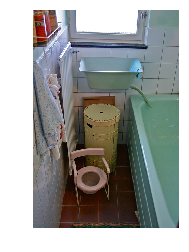

this bathroom has a green tub and a toilet chair
A very small and cramped bathroom with a small child's potty chair.
Tiny bathroom with green tub and baby seat with sink
A small bathroom with a blue sink and tub and a child's potty chair.
A bathroom with a handicapped toilet stool next to a tub


In [55]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [43]:
captions = json.load(open(captions_annFile, 'r'))

In [46]:
captions['annotations'][0]

{'caption': 'A bicycle replica with a clock as the front wheel.',
 'id': 37,
 'image_id': 203564}

In [36]:
def _isArrayLike(obj):
    return hasattr(obj, '__iter__') and hasattr(obj, '__len__')

In [53]:
def getAnnIds(imgIds=[], catIds=[], areaRng=[], iscrowd=None):
        """
        Get ann ids that satisfy given filter conditions. default skips that filter
        :param imgIds  (int array)     : get anns for given imgs
               catIds  (int array)     : get anns for given cats
               areaRng (float array)   : get anns for given area range (e.g. [0 inf])
               iscrowd (boolean)       : get anns for given crowd label (False or True)
        :return: ids (int array)       : integer array of ann ids
        """
        imgIds = imgIds if _isArrayLike(imgIds) else [imgIds]
        catIds = catIds if _isArrayLike(catIds) else [catIds]

        if len(imgIds) == len(catIds) == len(areaRng) == 0:
            anns = coco_caps.dataset['annotations']
        else:
            if not len(imgIds) == 0:
                lists = [coco_caps.imgToAnns[imgId] for imgId in imgIds if imgId in coco_caps.imgToAnns]
                anns = list(itertools.chain.from_iterable(lists))
            else:
                anns = coco_caps.dataset['annotations']
            anns = anns if len(catIds)  == 0 else [ann for ann in anns if ann['category_id'] in catIds]
            anns = anns if len(areaRng) == 0 else [ann for ann in anns if ann['area'] > areaRng[0] and ann['area'] < areaRng[1]]
        if not iscrowd == None:
            ids = [ann['id'] for ann in anns if ann['iscrowd'] == iscrowd]
        else:
            ids = [ann['id'] for ann in anns]
        return ids

In [54]:
getAnnIds(imgIds=coco.anns[ann_id]['image_id'])

[[{'id': 627962, 'caption': 'A young boy who is holding a tennis racket.', 'image_id': 45844}, {'id': 629645, 'caption': 'The kids are playing a game and the area is taped off. ', 'image_id': 45844}, {'id': 636635, 'caption': 'Two kids are playing tennis on a makeshift court.', 'image_id': 45844}, {'id': 637022, 'caption': 'the child is holding a tennis racket and waiting ', 'image_id': 45844}, {'id': 638327, 'caption': 'People stand around a store near the sidewalk sectioned off with ribbon.', 'image_id': 45844}]]


[{'id': 627962, 'caption': 'A young boy who is holding a tennis racket.', 'image_id': 45844}, {'id': 629645, 'caption': 'The kids are playing a game and the area is taped off. ', 'image_id': 45844}, {'id': 636635, 'caption': 'Two kids are playing tennis on a makeshift court.', 'image_id': 45844}, {'id': 637022, 'caption': 'the child is holding a tennis racket and waiting ', 'image_id': 45844}, {'id': 638327, 'caption': 'People stand around a store near the sidewalk section

[627962, 629645, 636635, 637022, 638327]

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)

In [65]:
import torch.nn as nn

In [66]:
rnn = nn.LSTM(10, 20, 2)

In [71]:
rnn.weight

AttributeError: 'LSTM' object has no attribute 'weight'